# Elementary effects sensitivity analysis method

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>

---

This notebook contains an introduction to the Elementary Effects method for sensitivity analysis, using Python and [SciPy](https://scipy.org/). It uses some Python3 features. Consult the [accompanying slides on risk-engineering.org](https://risk-engineering.org/sensitivity-analysis/) for details of the applications of sensitivity analysis and some intuition and theory of the technique.

In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

Let us consider the following function of 6 parameters, $x_1$ to $x_6$. 

$y(\textbf{x}) = 1.0 + 1.5x_2 + 1.5x_3 + 0.6x_4 + 1.7x_4^2 + 0.7x_5 + 0.8x_6 + 0.5(x_5 x_6)$

The parameters are stored in a Python vector. 

In [2]:
def y(x) -> float:
    return 1.0 + 1.5*x[2] + 1.5*x[3] + 0.6*x[4] + 1.7*x[4]**2 + 0.7*x[5] + 0.8*x[6] + 0.5*(x[5]*x[6])

We are interested in studying the behaviour of $y$ over the domain 

- $0 ≤ x_1, x_2, x_4, x_5, x_6 ≤ 1$

-  $0 ≤ x_3 ≤ 5$

where we assume the input variables all follow a uniform distribution.

We start by defining a function which will generate $\Delta\textbf{e}_i$, the unit vector in direction of the $i$-th axis. We choose to use a $\Delta$ of 10% of the range of each variable, so 0.1 for most variables and 0.5 for $x_3$.

In [3]:
def delta(i) -> float:
    x = numpy.zeros(7)
    x[0] = 1  # this is not used
    x[i] = 0.1
    if i == 3: x[3] = 0.5
    return x

Then a function to generate a random variate for $\textbf{x}$, a randomly selected point in our input space.

In [4]:
def random_x() -> float:
    x = numpy.ones(7)
    x[1] = numpy.random.uniform(0, 1)
    x[2] = numpy.random.uniform(0, 1)
    x[3] = numpy.random.uniform(0, 5)
    x[4] = numpy.random.uniform(0, 1)
    x[5] = numpy.random.uniform(0, 1)
    x[6] = numpy.random.uniform(0, 1)
    return x

We need a function to calculate the elementary effect of variable number $i$ at point $\textbf{x}$. Recall that the *elementary effect* for the $i$-th input variable at $\mathbf{x} ∈ [0,1]^k$ is the first difference approximation to the derivative of $f(·)$ at $\mathbf{x}$:
      
$EE_i(\mathbf{x}) = \frac{f(\textbf{x} + ∆\textbf{e}_i) − f(\textbf{x})}{∆}$
      
where $\textbf{e}_i$ is the unit vector in the direction of the $i$-th axis

**Intuition**: it’s the slope of the secant line parallel to the input axis.

In [5]:
def EE(i, x) -> float:
   return (y(x+delta(i)) - y(x))/0.1

To estimate the **sensitivity** (the relative influence) of variable number $i$, we calculate the average of $EE_i(\textbf{x})$ for various points $\textbf{x}$ randomly selected from the input domain, using our `random_x` function defined above:

$μ_i = \frac{1}{r} ∑_{j=1}^{r} \left|EE_i(x_j)\right|$

In [6]:
def sensitivity(i) -> float:
    sample = numpy.zeros(100)
    for j in range(100):
        sample[j] = EE(i, random_x())
    return numpy.absolute(sample).mean()

Let’s plot the results for our function $y$ defined above.

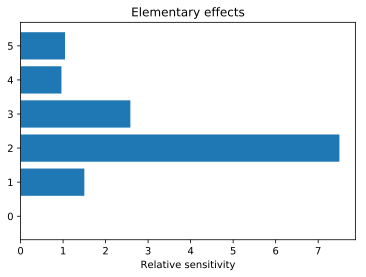

In [7]:
sensitivities = numpy.zeros(6)
names = {}
for i in range(1, 7):
   sensitivities[i-1] = sensitivity(i)
   names[i-1] = r'mu_{}'.format(i)
pos = numpy.arange(6) + 1
plt.barh(pos, sensitivities, align='center')
plt.yticks(pos, names)
plt.title(u"Elementary effects")
plt.xlabel(u"Relative sensitivity");

## Analysis

We note that:

-  $μ_1$ = 0 as expected (since $y(·)$ is functionally independent of $x_1$)

- the variable with the greatest influence is $x_3$ (it is varying over the greatest range)

- $x_4$ has more influence than $x_2$ (despite varying over the same range), because it is raised to a power

- from the analytical form of $y(·)$, we know that there will be some interaction effects between $x_5$ and $x_6$, but the    
  elementary effects method doesn’t allow us to characterize this (it’s only a screening method)